<div class="w3-bar w3-blue-grey w3-padding">
    <h2 class="w3-bar-item w3-padding-32"><!-- Text Here --></h2>
    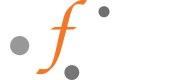
</div>

# Changing History

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Overview%3A%0A"><i class="fa fa-file-o"></i> Overview:
</h3>
    <ul>
<li><strong>Teaching:</strong> 20 min</li>
<li><strong>Exercises:</strong> 0 min</li>
</ul>
<p><strong>Questions</strong></p>
<ul>
<li>How should I change filenames in git</li>
<li>How do I remove files in Git</li>
<li>What does <code>checkout</code> do?</li>
<li>What are <code>revert</code> and <code>reset</code>?</li>
</ul>
<p><strong>Objectives</strong></p>
<ul>
<li>Know how to rename and remove git tracked files.</li>
<li>Understand that <code>checkout</code> moves you around in the git history.</li>
<li>Know that <code>revert</code> and <code>reset</code> move and remove commits respectively, they change history around you.</li>
<li>Know how to undo staging of files.</li>
</ul>
</div>

## Changing a filename

Let's say that we would like to create a duplicate of `mars.txt` e.g. so that so that Wolfman could record his own observation separately from Vlad.  Create a copy of mars.txt with:
```bash
% cp mars.txt mars2.txt
% ls
```
```brainfuck
mars.txt  mars2.txt
```

and add the file and commit it to the repository:
```bash
% git add mars2.txt
% git commit -m "Duplicated mars.txt for Wolfman's observations"
```
```brainfuck
[master 096d729] Duplicated mars.txt for Wolfman's observations
 1 file changed, 3 insertions(+)
 create mode 100644 mars2.txt
```

Later we realise that this isn't the most informative filename so decide to change the filename to `mars_wolfman.txt":
```bash
% mv mars2.txt mars_wolfman.txt
```

We can now check the status of the repository:
```bash
% git status
```
```brainfuck
On branch master
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

        deleted:    mars2.txt

Untracked files:
  (use "git add <file>..." to include in what will be committed)

        mars_wolfman.txt

no changes added to commit (use "git add" and/or "git commit -a")
```

We could now add the new file and while this is in principle okay, in that it will result in the file changing name, it is inefficient for git to delete and create with the same content.  However there is another git like way.  First lets revert the filename:
```bash
% mv mars_wolfman.txt mars2.txt
% git status
```
```brainfuck
On branch master
nothing to commit, working tree clean
```

Now we use the command:
```bash
% git mv mars2.txt mars_wolfman.txt
% git status
```
```brainfuck
On branch master
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

        renamed:    mars2.txt -> mars_wolfman
```
Note that these changes are staged we still have to commit the change, but we no longer have to `git add` the new filename.  Let's commit the change of filename:
```bash
% git commit -m "Changed filename for Wolfmans observations"
```
```brainfuck
[master 2d64b0a] Changed filename for Wolfmans observations
 1 file changed, 0 insertions(+), 0 deletions(-)
 rename mars2.txt => mars_wolfman.txt (100%)
```

Finally we learn that we will learn about how to deal with potential conflicts between commits in a future episode so decide to delete the new file.  Once again we could just remove the file with `rm` but suspect that as with changing filenames there might be a git way of removing files.  Indeed there is and we can remove the file from the repository with the command:
```bash
% git rm mars_wolfman.txt
% git status
```
```brainfuck
On branch master
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

        deleted:    mars_wolfman.txt
```

As always these changes are staged and we need to commit them to the repository:
```bash
% git commit -m "Deleted unnecessary wolfman duplicate file"
```
```brainfuck
[master 67edf4e] Deleted unnecessary wolfman duplicate file
 1 file changed, 3 deletions(-)
 delete mode 100644 mars_wolfman.txt
```

## Checkout, Revert and Reset

In the previous episode we used the command `git checkout HEAD <file>`, to undo changes to a file that we wanted to discard.  Used in this was checkout switches to the version of the file in the specified commit.  We can also use checkout without specifying a filename, to move to a different position in the git history, as seen in the previous episode under "Don’t Lose Your HEAD".

What happens if we want to undo some changes we have made in error but keep a record of them instead of moving around in the history.  Perhaps we don't believe our instructor that it is possible to deal with conflicts and we want to `revert` to the previous commit before `mars_wolfman.txt` was deleted.  We could try running `git checkout HEAD~1 mars_wolfman.txt` but if we had removed or changed several files then this would take a while and we might forget to checkout out one of the files. 

Fortunately git offers us a quick way to do this with the command, and check the review the git log for the last two commits:
```bash
% git revert HEAD # Note we want to revert the last commit
% git log -2
```
```brainfuck
commit f8e774dab9bc05cf72d92df90297d0dd352f2fcd (HEAD -> master)
Author: James Grant <r.j.grant@bath.ac.uk>
Date:   Fri Nov 9 14:56:34 2018 +0000

    Revert "Deleted unnecessary wolfman duplicate file"

    This reverts commit 67edf4e4268580162931e994d0e960ac11d44bcb.

commit 67edf4e4268580162931e994d0e960ac11d44bcb
Author: James Grant <r.j.grant@bath.ac.uk>
Date:   Fri Nov 9 14:28:28 2018 +0000

    Deleted unnecessary wolfman duplicate file
```

After speaking with your collaborator you decide to bare with your instructor for the rest of the workshop and want to undo the changes you've made to avoid embarassment.  This is of course unnecessary as we are all here learning together, but perhaps we want to tidy the repository a bit.  We can remove any record of what we've been doing with the reset command.

First lets check theoneline version of the log:
```bash
% git log --oneline
```
```brainfuck
f8e774d (HEAD -> master) Revert "Deleted unnecesssary duplicate"
67edf4e Deleted unnecesssary duplicate
2d64b0a Changed file2.txt name
096d729 duplicated
a5fb509 Discuss concerns about Mars' climate for Mummy
70244e4 Add concerns about effects of Mars' moons on Wolfman
d0aac91 Start notes on Mars as a base
```

We want to go back to the commit before we duplicated the file, when we "Discuss concerns about Mars' climate for Mummy", i.e. remove everything we've done in this episode from the repository.  We can do this with the command `git reset`

```bash
% git reset a5fb509
% git status
% git log --online
```
```brainfuck
a5fb509 Discuss concerns about Mars' climate for Mummy
70244e4 Add concerns about effects of Mars' moons on Wolfman
d0aac91 Start notes on Mars as a base
```

Note that `git reset` has (apparently) deleted all commits after the one we have chosen to reset to.  This is different from `revert` which changed the current state of the repository but preserved the history and appended a new commit.

## Unstaging Files

What happens if we make some changes to a file and `git add` them but decide we are not yet ready to commit.  We can unstage these commits in (at least) on of two ways.  First let's add a new line:
```bash
% nano mars.txt
% cat mars.txt
```
```brainfuck
Cold and dry, but everything is my favorite color
The two moons may be a problem for Wolfman
But the Mummy will appreciate the lack of humidity
An unyet sure change
```
and stage the change:
```bash
% git add mars.txt
% git status
```
```brainfuck
On branch master
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

        modified:   mars.txt

```

Fortunately `git` has given us a suggestion as to how we can unstage these changes `"git reset HEAD <file>..."`.  Let's see what happens if we do this:
```bash
% git reset HEAD mars.txt
% git status
```
```brainfuck
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

        modified:   mars.txt

no changes added to commit (use "git add" and/or "git commit -a")
```
```bash
% cat mars.txt
```
```brainfuck
Cold and dry, but everything is my favorite color
The two moons may be a problem for Wolfman
But the Mummy will appreciate the lack of humidity
An unyet sure change
```

The file has been unstaged but the changes we made to the file have been preserved.  We don't want to keep this change so we checkout the previous version of the file with:
```bash
% git checkout HEAD mars.txt
% cat mars.txt
```
```brainfuck
Cold and dry, but everything is my favorite color
The two moons may be a problem for Wolfman
But the Mummy will appreciate the lack of humidity
```
```bash
% git status
```
```brainfuck
On branch master
nothing to commit, working tree clean
```

## Remove staged files from the repository

Finally what if we `git add` a file by mistake.  We need to remove it from the staging area but don't want to delete it from the directory.  Perhaps we have accidentally added an interim or output file.  First lets create a new file and add it to the the repository:
```bash
% touch phobos.txt
% git add phobos.txt
% git status
```
```brainfuck
On branch master
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

        new file:   phobos.txt
```

What happens if we try to `git rm` the file:
```bash 
git rm phobos.txt
```
```brainfuck
error: the following file has changes staged in the index:
    phobos.txt
(use --cached to keep the file, or -f to force removal)
```

Git won't let us to simply remove the file since the changes have already been staged.  Note that once again `git` has prompted us for what we might want to do, indeed it recomments using the `--cached` flag if we only intend to unstafe the file.  Let's gie it a try:
```bash
% git rm --cached phobos.txt
```
```brainfuck
rm 'phobos.txt'
```
This looks like the file has been removed but we can check its status with:
```bash
% ls
```
```brainfuck
mars.txt  phobos.txt
```
and:
```bash
% git status
```
```brainfuck
On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)

        phobos.txt

nothing added to commit but untracked files present (use "git add" to track)

```

So `phobos.txt` is no longer being tracked by git but has not been deleted.  Actually we decide we don't need this empty file  apparently there's nothing of interest worthy of recording on phobos so we delete the file.  As it is not in the git repository we can just use:
```bash
% rm phobos.txt
% ls
```
```brainfuck
mars.txt
```
```bash
% git status
```
```brainfuck
On branch master
nothing to commit, working tree clean
```

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Key-Points%3A%0A"><i class="fa fa-key"></i> Key Points:
</h3>
    <ul>
<li><code>git mv</code> can be used to rename or move files within the repository.</li>
<li><code>git rm</code> can be used to remove a file from a repository, or with <code>--cached</code> unstage a file</li>
<li><code>git checkout &lt;commit id&gt; &lt;file&gt;</code> recovers old versions of files.</li>
<li><code>git checkout &lt;commit id&gt;</code> moves your position in the repository.</li>
<li><code>git revert</code> can be used to revert the entire repository to a previous state, or undo changes in range of commits, creating a <em>new</em> commit.</li>
<li><code>git reset</code> changes the current HEAD to an earlier commit</li>
</ul>
</div>

<div class="w3-bar w3-blue-grey">
<a href="./05_episode.ipynb" class="w3-left-align w3-bar-item w3-button w3-mobile" style="width:33%"><h2><i class="fa fa-angle-double-left"></i> Previous</h2></a>
<a href="./00_schedule.ipynb" class="w3-bar-item w3-button w3-center w3-mobile" style="width:33%"><h2>Schedule</h2></a>
<a href="./07_episode.ipynb" class="w3-right-align w3-bar-item w3-button w3-right w3-mobile" style="width:33%"><h2>Next <i class="fa fa-angle-double-right"></i></h2></a>
</div>